In [162]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df=pd.read_csv('/content/DM2425_ABCDEats_DATASET.csv',delimiter=',')

In [164]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [166]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [167]:
df.describe(include=['object'])

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


### Vamos averiguar a situação dos duplicados

In [168]:
print(df.drop_duplicates())

      customer_id customer_region  customer_age  vendor_count  product_count  \
0      1b8f824d5e            2360          18.0             2              5   
1      5d272b9dcb            8670          17.0             2              2   
2      f6d1b2ba63            4660          38.0             1              2   
3      180c632ed8            4660           NaN             2              3   
4      4eb37a6705            4660          20.0             2              5   
...           ...             ...           ...           ...            ...   
31883  f4e366c281            8670          30.0             1              1   
31884  f6b6709018            8670           NaN             1              1   
31885  f74ad8ce3f            8670          24.0             1              1   
31886  f7b19c0241            8670          34.0             1              1   
31887  fd40d3b0e0            4660          30.0             1              1   

       is_chain  first_order  last_orde

In [169]:
df.duplicated().sum()

13

In [170]:
df=df.drop_duplicates()
df.duplicated().sum()

0

## Vamos averiguar a situação dos missing values

In [171]:
(df.isna().mean()*100).sort_values(ascending=False)

,0
HR_0,3.651765
customer_age,2.280784
first_order,0.332549
customer_id,0.000000
HR_10,0.000000
DOW_6,0.000000
HR_1,0.000000
HR_2,0.000000
HR_3,0.000000
HR_4,0.000000


# Análise das variáveis originais

## Vamos analisar a variável age

Vamos tratar a idade como uma variável categórica, pois traz-nos uma análise mais simplificada para o problema


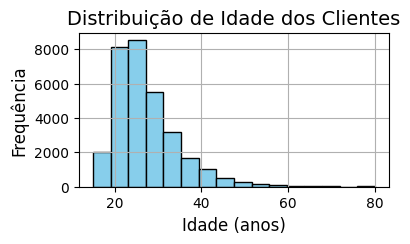

In [172]:
plt.figure(figsize=(4,2))
plt.hist(df['customer_age'], bins=16, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade dos Clientes', fontsize=14)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()

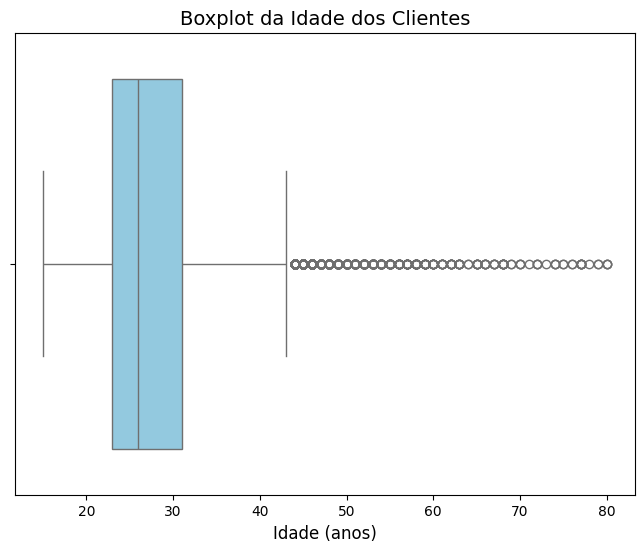

In [173]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['customer_age'], color='skyblue')
plt.title('Boxplot da Idade dos Clientes', fontsize=14)
plt.xlabel('Idade (anos)', fontsize=12)
plt.show()

Podemos observar pelo boxplot e histograma que a variável possuium bom número de outliers. Esta é assimétrica positiva o que no seeu contexto quererá dizer que os clientes deste serviço são predominantemente pessoas jovem entre os 20 e os 30.

Existe outro problema que temos de tratar que são os missing values desta variável que são cerca de 3,65% da mesma. Devido à multidimensionalidade desta base de dados e da sua dimensão decidimos utilizar o KNN para preencher estes missing values.

## Vamos analisar a variável customer_region

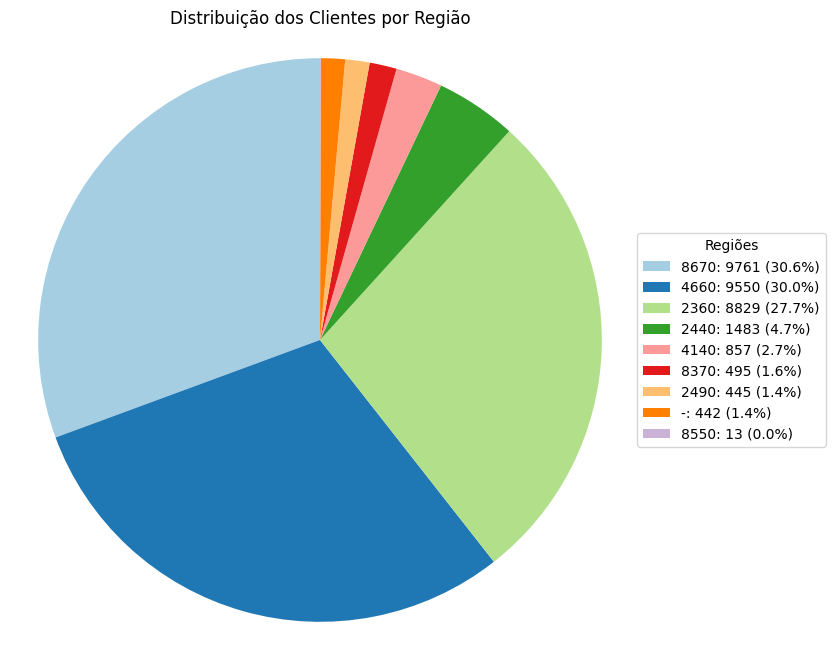

In [174]:
# Filtrar os valores válidos (não-NA) para a coluna 'customer_region'
region_counts = df['customer_region'].value_counts(dropna=True)

# Definir cores (uma cor diferente para cada região)
colors = plt.cm.Paired(range(len(region_counts)))

# Criar o gráfico de pizza sem percentagens no gráfico
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)

# Adicionar a percentagem na legenda
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]

# Configurar a legenda com nomes das regiões e percentagens
plt.legend(wedges, legend_labels, title="Regiões", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Configurações adicionais
plt.title("Distribuição dos Clientes por Região")
plt.axis('equal')  # Assegurar que o gráfico seja desenhado como um círculo

# Mostrar o gráfico
plt.show()

## Vamos analisar a variável vendor_count

> Adicionar blockquote



In [175]:
vendor_count_series = df['vendor_count'].value_counts().sort_index()
print(vendor_count_series)

vendor_count
0      138
1     9059
2     8547
3     5173
4     2984
5     1875
6     1166
7      816
8      594
9      396
10     285
11     219
12     146
13     108
14     101
15      62
16      41
17      34
18      26
19      20
20      22
21       9
22       7
23      12
24       6
25       6
26       2
27       5
28       3
29       2
30       3
31       1
32       2
34       2
35       1
40       1
41       1
Name: count, dtype: int64


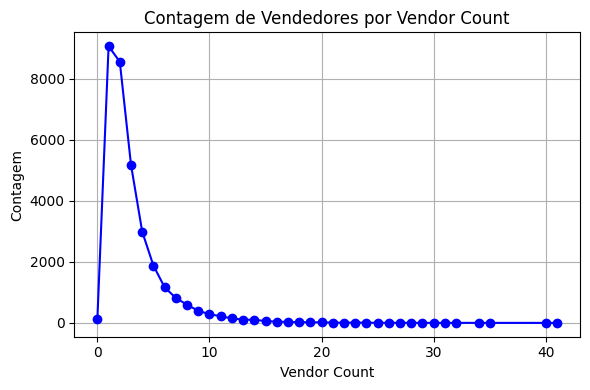

In [176]:
plt.figure(figsize=(6, 4))
plt.plot(vendor_count_series.index, vendor_count_series.values, marker='o', linestyle='-', color='b')  # 'b' para azul

# Configurações do gráfico
plt.title('Contagem de Vendedores por Vendor Count')
plt.xlabel('Vendor Count')
plt.ylabel('Contagem')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()  # Ajustar o layout
plt.show()

## Vamos analisar a variável product_count

In [177]:
product_count_series = df['product_count'].value_counts().sort_index()
print(product_count_series)

product_count
0       156
1      4690
2      6282
3      4970
4      3404
       ... 
97        1
109       1
110       1
117       1
269       1
Name: count, Length: 93, dtype: int64


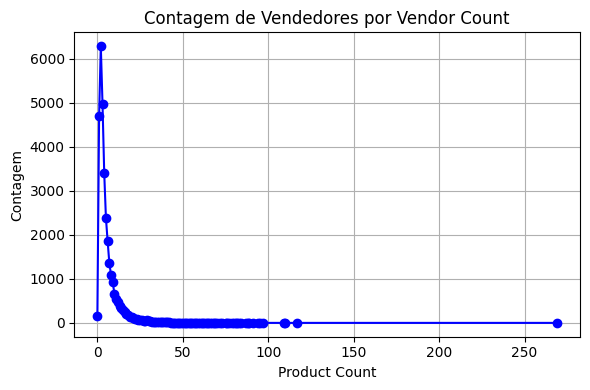

In [178]:
plt.figure(figsize=(6, 4))
plt.plot(product_count_series.index, product_count_series.values, marker='o', linestyle='-', color='b')
plt.title('Contagem de Vendedores por Vendor Count')
plt.xlabel('Product Count')
plt.ylabel('Contagem')
plt.grid(True)
plt.tight_layout()
plt.show()

## Vamos analisar as variáveis first_order e last_order

> Adicionar blockquote



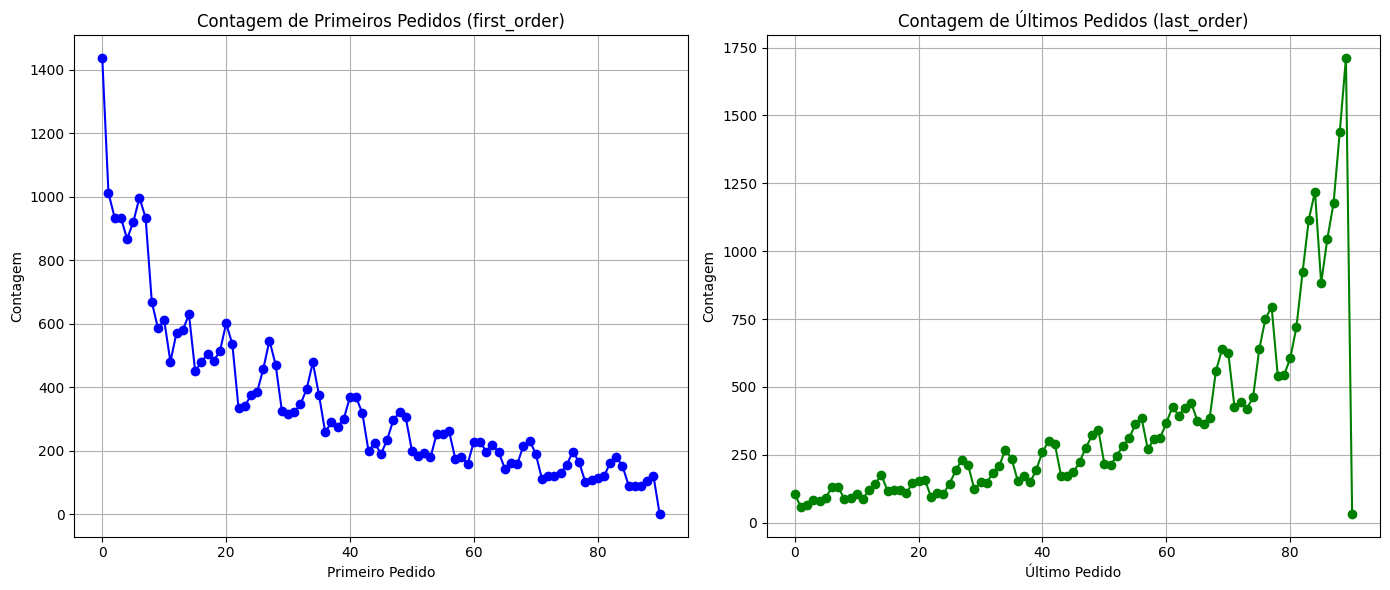

In [179]:
first_order_counts = df['first_order'].value_counts().sort_index()
last_order_counts = df['last_order'].value_counts().sort_index()

# Criar a figura e os eixos para os subgráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para 'first_order'
axs[0].plot(first_order_counts.index, first_order_counts.values, marker='o', linestyle='-', color='b')
axs[0].set_title('Contagem de Primeiros Pedidos (first_order)')
axs[0].set_xlabel('Primeiro Pedido')
axs[0].set_ylabel('Contagem')
axs[0].grid(True)

# Gráfico para 'last_order'
axs[1].plot(last_order_counts.index, last_order_counts.values, marker='o', linestyle='-', color='g')
axs[1].set_title('Contagem de Últimos Pedidos (last_order)')
axs[1].set_xlabel('Último Pedido')
axs[1].set_ylabel('Contagem')
axs[1].grid(True)

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

## Vamos analisar a variável last_promo


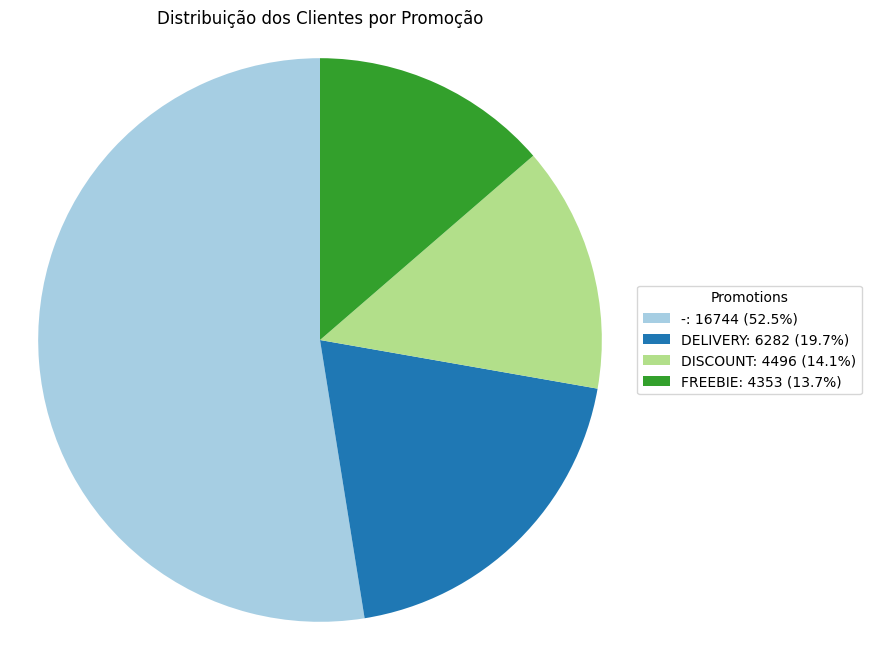

In [180]:
# Filtrar os valores válidos (não-NA) para a coluna 'customer_region'
region_counts = df['last_promo'].value_counts(dropna=True)

# Definir cores (uma cor diferente para cada região)
colors = plt.cm.Paired(range(len(region_counts)))

# Criar o gráfico de pizza sem percentagens no gráfico
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)

# Adicionar a percentagem na legenda
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]

# Configurar a legenda com nomes das regiões e percentagens
plt.legend(wedges, legend_labels, title="Promotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Configurações adicionais
plt.title("Distribuição dos Clientes por Promoção")
plt.axis('equal')  # Assegurar que o gráfico seja desenhado como um círculo

# Mostrar o gráfico
plt.show()

## Vamos analisar a variável payment_method

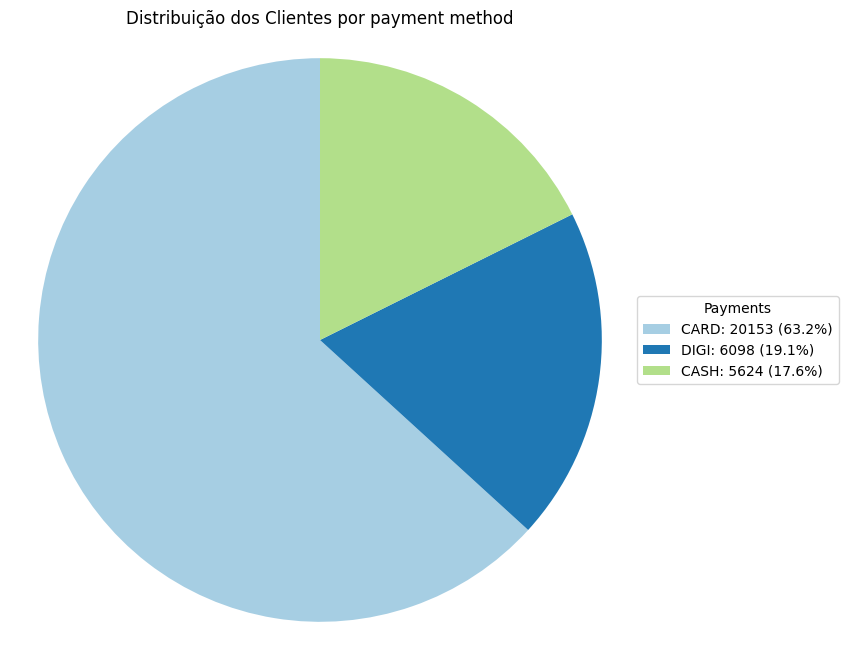

In [181]:
# Filtrar os valores válidos (não-NA) para a coluna 'customer_region'
region_counts = df['payment_method'].value_counts(dropna=True)

# Definir cores (uma cor diferente para cada região)
colors = plt.cm.Paired(range(len(region_counts)))

# Criar o gráfico de pizza sem percentagens no gráfico
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)

# Adicionar a percentagem na legenda
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]

# Configurar a legenda com nomes das regiões e percentagens
plt.legend(wedges, legend_labels, title="Payments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Configurações adicionais
plt.title("Distribuição dos Clientes por payment method")
plt.axis('equal')  # Assegurar que o gráfico seja desenhado como um círculo

# Mostrar o gráfico
plt.show()

## Vamos analisar as variáveis CUI`s

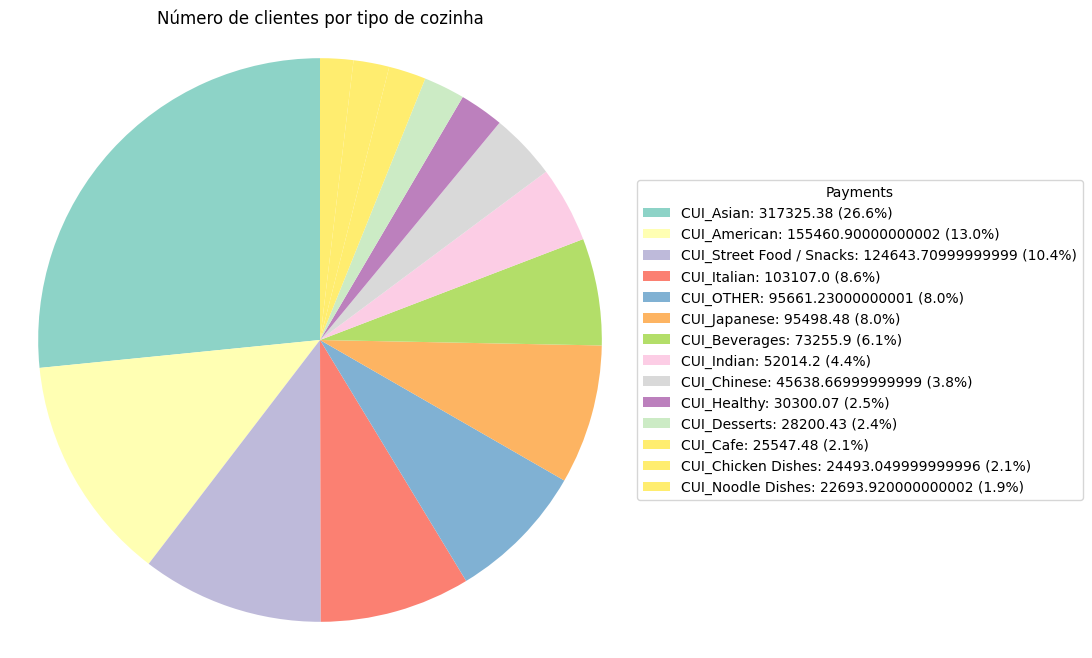

In [182]:
sums_types=df[['CUI_American','CUI_Asian','CUI_Beverages','CUI_Cafe','CUI_Chicken Dishes','CUI_Chinese','CUI_Desserts','CUI_Healthy','CUI_Indian','CUI_Italian','CUI_Japanese','CUI_Noodle Dishes','CUI_OTHER','CUI_Street Food / Snacks']].sum().sort_values(ascending=False)
# Definir cores (uma cor diferente para cada região)
colors = plt.cm.Set3(range(len(sums_types)))

# Criar o gráfico de pizza sem percentagens no gráfico
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sums_types, startangle=90, colors=colors)

# Adicionar a percentagem na legenda
legend_labels = [f'{region}: {count} ({100 * count / sum(sums_types):.1f}%)' for region, count in zip(sums_types.index, sums_types)]

# Configurar a legenda com nomes das regiões e percentagens
plt.legend(wedges, legend_labels, title="Payments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Configurações adicionais
plt.title("Número de clientes por tipo de cozinha")
plt.axis('equal')  # Assegurar que o gráfico seja desenhado como um círculo

# Mostrar o gráfico
plt.show()

## Vamos analisar as variáveis DOW`s

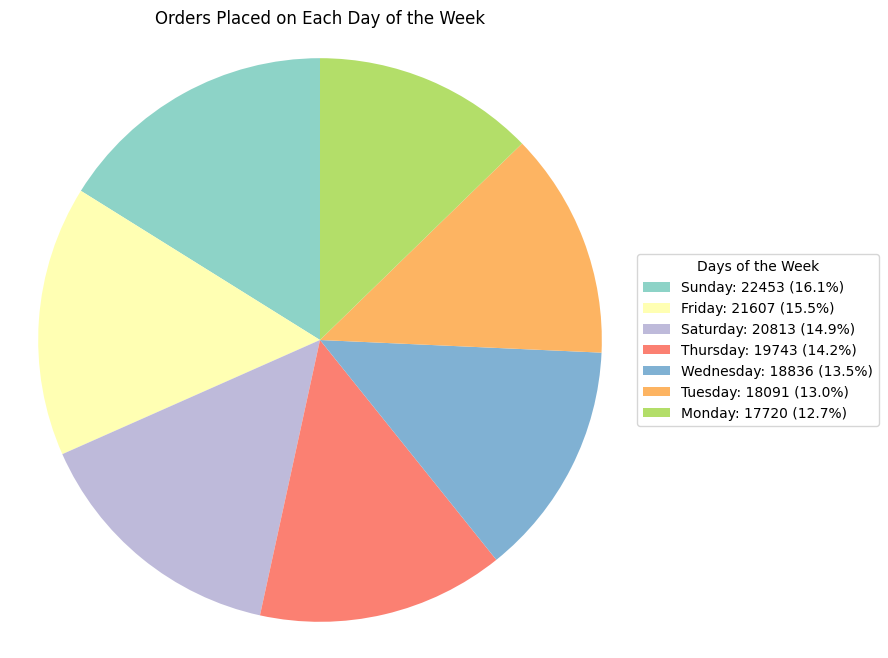

In [183]:
sums_types = df[['DOW_0','DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6']].sum().sort_values(ascending=False)
colors = plt.cm.Set3(range(len(sums_types)))
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sums_types, startangle=90, colors=colors)
dias_da_semana = ['Sunday', 'Friday', 'Saturday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
legend_labels = [f'{day}: {count} ({100 * count / sum(sums_types):.1f}%)' for day, count in zip(dias_da_semana, sums_types)]
plt.legend(wedges, legend_labels, title="Days of the Week", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Orders Placed on Each Day of the Week")
plt.axis('equal')  # Assegurar que o gráfico seja desenhado como um círculo
plt.show()

## Vamos analisar as variáveis *HR*`s

In [184]:
df['HR_0'].value_counts()

,count
HR_0,
0.0,30711


A variável HR_0 é a unica com missing values, como os seus valores existentes são todos nulos, vamos substituir os missing values com 0 pois isso não irá afetar a dataframe.

In [185]:
df['HR_0'] = df['HR_0'].fillna(0)
df['HR_0'].isna().sum()

0

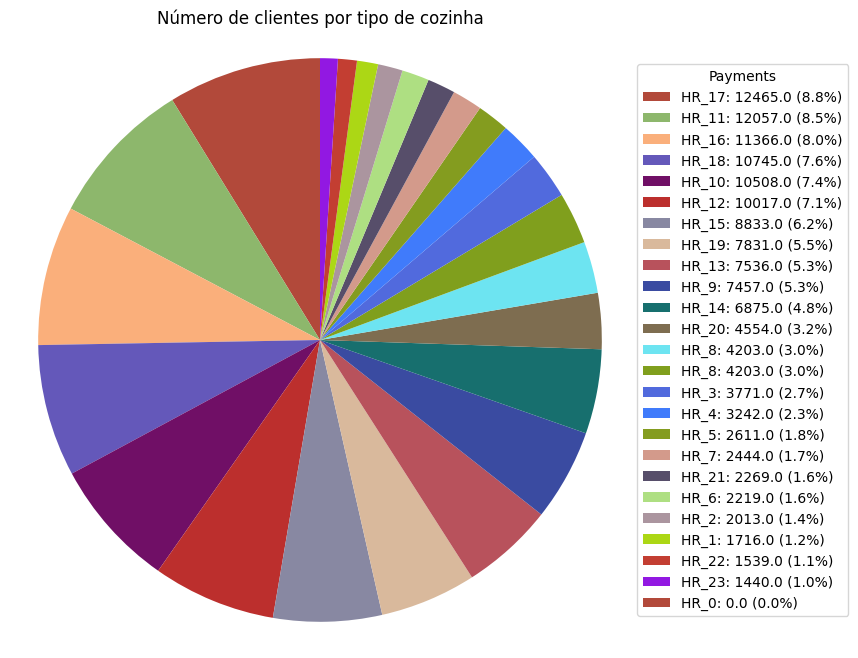

In [186]:
sums_types=df[['HR_0','HR_1','HR_2','HR_3','HR_4','HR_5','HR_6','HR_7','HR_8','HR_8','HR_9','HR_10','HR_11','HR_12','HR_13','HR_14','HR_15','HR_16','HR_17','HR_18','HR_19','HR_20','HR_21','HR_22','HR_23']].sum().sort_values(ascending=False)
# Definir cores (uma cor diferente para cada região)
np.random.seed(123)
colors = np.random.rand(24, 3)  # 24 cores com 3 canais (RGB)
# Criar o gráfico de pizza sem percentagens no gráfico
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sums_types, startangle=90, colors=colors)

# Adicionar a percentagem na legenda
legend_labels = [f'{region}: {count} ({100 * count / sum(sums_types):.1f}%)' for region, count in zip(sums_types.index, sums_types)]

# Configurar a legenda com nomes das regiões e percentagens
plt.legend(wedges, legend_labels, title="Payments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Configurações adicionais
plt.title("Número de clientes por tipo de cozinha")
plt.axis('equal')  # Assegurar que o gráfico seja desenhado como um círculo

# Mostrar o gráfico
plt.show()

# Vamos verificar por incoerencias

## Incoerencia entre HR'S  e DOW's

In [187]:
sum_HR=df['HR_0']+df['HR_1']+df['HR_2']+df['HR_3']+df['HR_4']+df['HR_5']+df['HR_6']+df['HR_7']+df['HR_8']+df['HR_9']+df['HR_10']+df['HR_11']+df['HR_12']+df['HR_13']+df['HR_14']+df['HR_15']+df['HR_16']+df['HR_17']+df['HR_18']+df['HR_19']+df['HR_20']+df['HR_21']+df['HR_22']+df['HR_23']
sum_DOW=df['DOW_0']+df['DOW_1']+df['DOW_2']+df['DOW_3']+df['DOW_4']+df['DOW_5']+df['DOW_6']
df['inc_0']=(sum_HR!=sum_DOW)
df['inc_0'].value_counts()

,count
inc_0,
False,30711
True,1164


## Incoerencia entre a soma de compras no dia de semana e o numero de orders num unico estabelecimento

In [188]:
df['inc_1']=(sum_HR)<df['vendor_count']
df['inc_1'].value_counts()

,count
inc_1,
False,31303
True,572


## Incoerencia entre a soma de compras nas horas e o numero de orders num unico estabelecimento

In [189]:
df['inc_2']=(sum_DOW)<df['vendor_count']
df['inc_2'].value_counts()

,count
inc_2,
False,31875


## Incoerencia entre last_order e first_order

In [190]:
df['inc_3']=df['last_order']<df['first_order']
df['inc_3'].value_counts()

,count
inc_3,
False,31875


## Incoerencia entre product_count e vendor_count

In [191]:
df['inc_4']=df['product_count']<df['vendor_count'] | ((df['product_count']>0) & (df['vendor_count']==0))
df['inc_4'].value_counts()

,count
inc_4,
False,31857
True,18


## Incoerencia entre payment_method e product_count ou vendor_count

In [192]:
df['inc_5']=(df['payment_method']!='-')& ((df['product_count']==0) | (df['vendor_count']==0))
df['inc_5'].value_counts()

,count
inc_5,
False,31719
True,156


## Incoerencia entre types of cuisine e product_count ou vendor_count

In [193]:
df['inc_6']=(df['CUI_Asian']+df['CUI_American']+df['CUI_Beverages']+df['CUI_Cafe']+df['CUI_Chicken Dishes']+df['CUI_Chinese']+df['CUI_Desserts']+df['CUI_Healthy']+df['CUI_Indian']+df['CUI_Italian']+df['CUI_Japanese']+df['CUI_Noodle Dishes']+df['CUI_OTHER']+df['CUI_Street Food / Snacks']==0)&(df['product_count'] > 0)
print(df['inc_6'].value_counts())
k=df[df['customer_id']=='ecae5f4620']
k.iloc[:,[3,4,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]

inc_6
False    31637
True       238
Name: count, dtype: int64


,vendor_count,product_count,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
731,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.77


# Creation of new variables

## Creation of the variable order_time_spread

In [194]:
hour_columns = [f'HR_{i}' for i in range(24)]
def weighted_time_spread(row):
    hours = np.arange(24)
    order_counts = row[hour_columns].values
    if np.sum(order_counts) == 0:
        return np.nan
    mean_hour = np.average(hours, weights=order_counts)
    variance = np.average((hours - mean_hour)**2, weights=order_counts)
    return np.sqrt(variance)

# Apply the function to each row (customer) and create a new column for 'order_time_spread'
df['order_time_spread'] = df.apply(weighted_time_spread, axis=1)

# Displaying the first few rows to verify the new column
print(df[['customer_id', 'order_time_spread']].head())

  customer_id  order_time_spread
0  1b8f824d5e                0.0
1  5d272b9dcb                0.5
2  f6d1b2ba63                1.0
3  180c632ed8                1.5
4  4eb37a6705                0.5


In [195]:
df['order_time_spread'].describe()

,order_time_spread
count,31640.000000
mean,1.882454
std,1.829096
min,0.000000
25%,0.000000
50%,1.500000
75%,3.110220
max,11.000000


In [196]:
df['order_time_spread'].isna().sum()

235

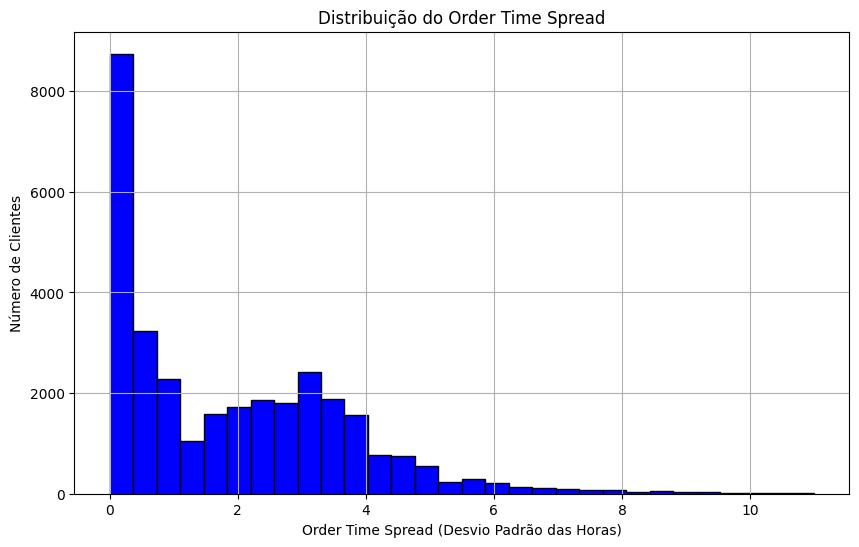

In [197]:
plt.figure(figsize=(10, 6))
plt.hist(df['order_time_spread'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Distribuição do Order Time Spread')
plt.xlabel('Order Time Spread (Desvio Padrão das Horas)')
plt.ylabel('Número de Clientes')
plt.grid(True)
plt.show()

## Criação da variável Total_Spended

In [198]:
df['Total_Spended']=df['CUI_Asian']+df['CUI_American']+df['CUI_Beverages']+df['CUI_Cafe']+df['CUI_Chicken Dishes']+df['CUI_Chinese']+df['CUI_Desserts']+df['CUI_Healthy']+df['CUI_Indian']+df['CUI_Italian']+df['CUI_Japanese']+df['CUI_Noodle Dishes']+df['CUI_OTHER']+df['CUI_Street Food / Snacks']
df['Total_Spended'].describe()

,Total_Spended
count,31875.000000
mean,37.453817
std,45.768390
min,0.000000
25%,12.430000
50%,23.860000
75%,43.975000
max,1308.690000


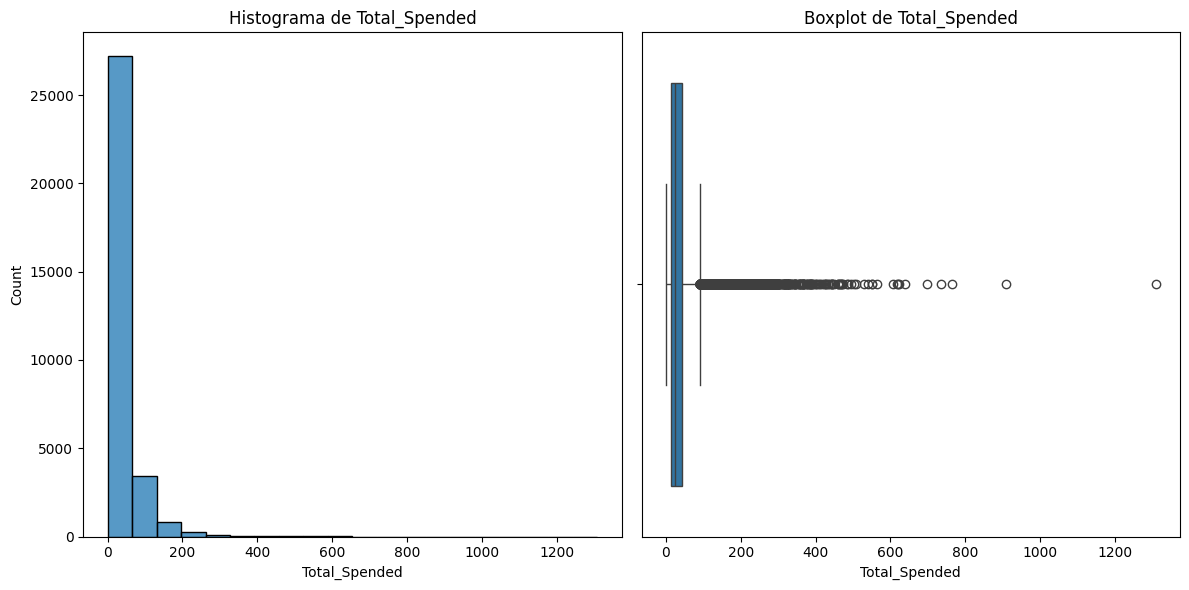

In [199]:
plt.figure(figsize=(12, 6))

# Criar o primeiro subplot para o histograma
plt.subplot(1, 2, 1)
sns.histplot(df['Total_Spended'], bins=20, kde=False)
plt.title('Histograma de Total_Spended')

# Criar o segundo subplot para o boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total_Spended'])
plt.title('Boxplot de Total_Spended')

# Exibir os gráficos
plt.tight_layout()
plt.show()

Podemos observar que esta variável contem uma grande quantidade de outliers

In [200]:
df['Total_Spended'].isna().sum()

0

## Criação da variável order_day_spread

In [201]:
day_columns = [f'DOW_{i}' for i in range(7)]
def weighted_time_spread(row):
    days = np.arange(7)
    order_counts = row[day_columns].values
    if np.sum(order_counts) == 0:
        return np.nan
    mean_hour = np.average(days, weights=order_counts)
    variance = np.average((days - mean_hour)**2, weights=order_counts)
    return np.sqrt(variance)

# Apply the function to each row (customer) and create a new column for 'order_time_spread'
df['order_day_spread'] = df.apply(weighted_time_spread, axis=1)

# Displaying the first few rows to verify the new column
print(df[['customer_id', 'order_day_spread']].head())

  customer_id  order_day_spread
0  1b8f824d5e               3.0
1  5d272b9dcb               3.0
2  f6d1b2ba63               3.0
3  180c632ed8               2.5
4  4eb37a6705               2.5


In [202]:
df['order_day_spread'].describe()

,order_day_spread
count,31737.000000
mean,1.111897
std,0.865133
min,0.000000
25%,0.000000
50%,1.224745
75%,1.870004
max,3.000000


In [203]:
df['order_time_spread'].isna().sum()

235

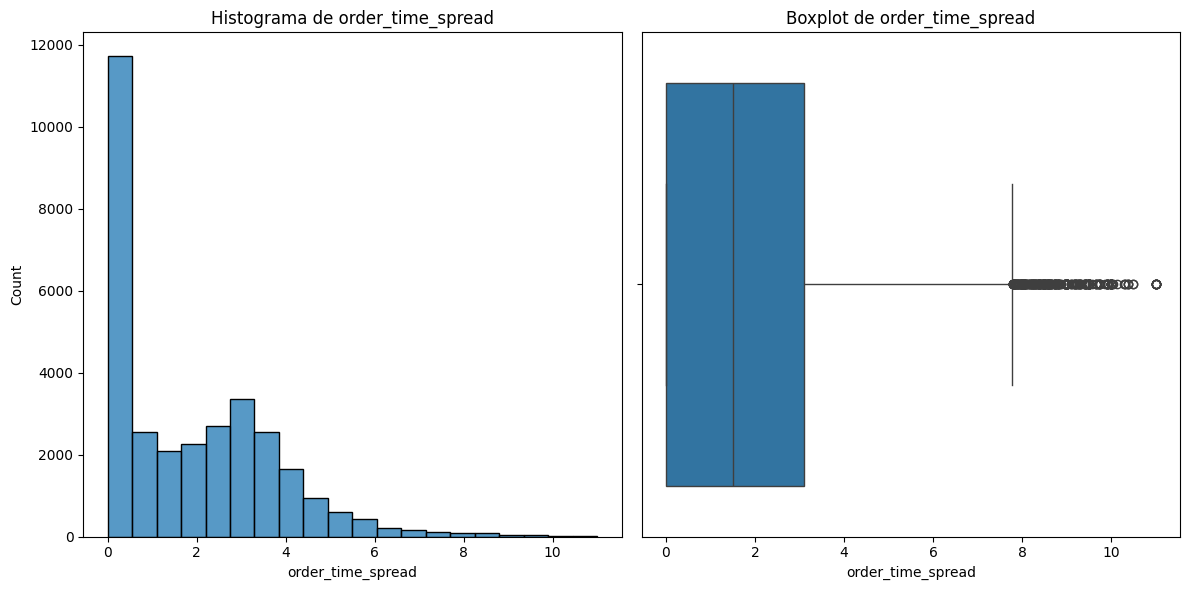

In [204]:
plt.figure(figsize=(12, 6))

# Criar o primeiro subplot para o histograma
plt.subplot(1, 2, 1)
sns.histplot(df['order_time_spread'], bins=20, kde=False)
plt.title('Histograma de order_time_spread')

# Criar o segundo subplot para o boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['order_time_spread'])
plt.title('Boxplot de order_time_spread')

# Exibir os gráficos
plt.tight_layout()
plt.show()

## Criação da variável diversity_cuisine

In [205]:
df['diversity_cuisine'] = (df[['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chinese', 'CUI_Chicken Dishes',
                               'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
                               'CUI_Street Food / Snacks', 'CUI_Thai', 'CUI_OTHER']] > 0).sum(axis=1)

In [206]:
df['diversity_cuisine'].describe()

,diversity_cuisine
count,31875.000000
mean,2.212016
std,1.453481
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,12.000000


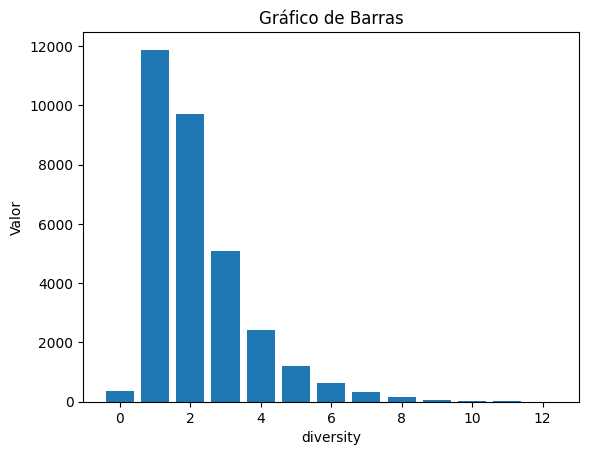

In [207]:
df_agrupado = df.groupby('diversity_cuisine').size().reset_index(name='count')
plt.bar(df_agrupado['diversity_cuisine'], df_agrupado['count'])
plt.xlabel('diversity')
plt.ylabel('Valor')
plt.title('Gráfico de Barras')
plt.show()

##Criação da variável order_count

In [208]:
df['order_count']=df['DOW_0']+df['DOW_1']+df['DOW_2']+df['DOW_3']+df['DOW_4']+df['DOW_5']+df['DOW_6']

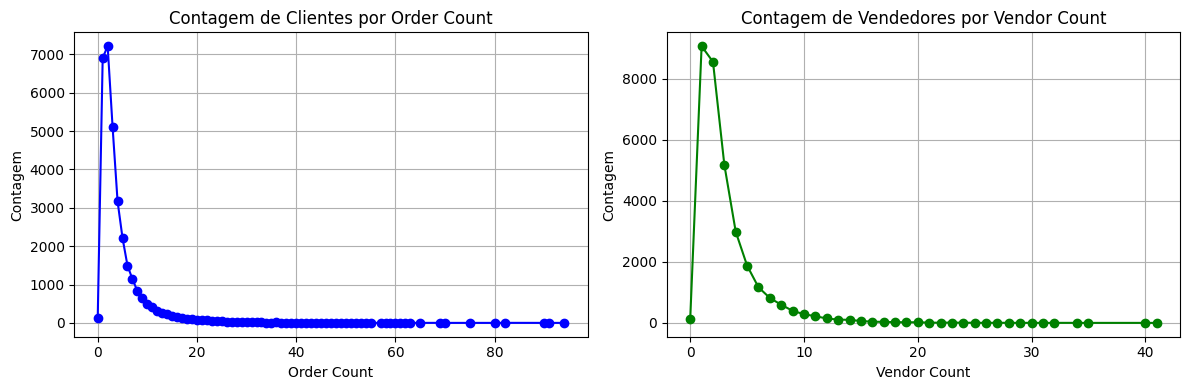

In [209]:
order_count_series = df['order_count'].value_counts().sort_index()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Primeiro gráfico (Contagem de clientes por número de pedidos)
axs[0].plot(order_count_series.index, order_count_series.values, marker='o', linestyle='-', color='b')
axs[0].set_title('Contagem de Clientes por Order Count')
axs[0].set_xlabel('Order Count')
axs[0].set_ylabel('Contagem')
axs[0].grid(True)

# Segundo gráfico (Contagem de vendedores por Vendor Count)
axs[1].plot(vendor_count_series.index, vendor_count_series.values, marker='o', linestyle='-', color='g')
axs[1].set_title('Contagem de Vendedores por Vendor Count')
axs[1].set_xlabel('Vendor Count')
axs[1].set_ylabel('Contagem')
axs[1].grid(True)

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

## Criação da variável intensity_of_activity

In [211]:
df['intensity_of_activity'] = df['order_count'] / (df['last_order'] - df['first_order'])